paket installieren:

Terminal > New Terminal

venv aktivieren:
```
.\.venv\Scripts\activate
```

paket installieren:

```
pip install pandas
``` 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math


In [3]:
# file paths
path_motors_none_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/Motors_None_Rounded/2025-01-22_17-03-38.sensors.dat"
path_motors_none_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/Motors_None_Rounded/2025-01-22_17-03-38.dat"
path_imu_integral_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/2025-01-22_16-54-27.sensors.dat"
path_imu_integral_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/2025-01-22_16-54-27.dat"
path_imu_madgwick_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Rounded/2025-01-22_15-06-50.sensors.dat"
path_imu_madgwick_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Rounded/2025-01-22_15-06-50.dat"
path_imu_madgwick_square_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Square/2025-01-22_16-03-09.sensors.dat"
path_imu_madgwick_square_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Square/2025-01-22_16-03-09.dat"
path_pid_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests_neu/2025-03-11_15-10-26.sensors.dat"
path_pid_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests_neu/2025-03-11_15-10-26.dat"

# header für imu daten
column_names_motors = ["frame", "start_stopp", "empty0", "empty1", "empty2", "empty3", "empty4"]
column_names_madgwick = ["frame", "start_stopp", "angle", "o_w", "o_x", "o_y", "o_z"]
column_names_integral = ["frame", "start_stopp", "angle", "NaN", "gyro_x", "gyro_y", "gyro_z"]
column_names_pid_alt = ["frame", "angle", "target", "pid_out", "vl", "vr"]
column_names_pid = ["frame", "event"]

# dateien einlesen in pd dataframes
df_path_motors_none_rounded_imu = pd.read_csv(path_motors_none_rounded_imu, sep=' ', header=None, names=column_names_motors)
df_path_motors_none_rounded_cam = pd.read_csv(path_motors_none_rounded_cam, sep=' ', header=0)
df_path_imu_integral_rounded_imu = pd.read_csv(path_imu_integral_rounded_imu, sep=' ', header=None, names=column_names_integral)
df_path_imu_integral_rounded_cam = pd.read_csv(path_imu_integral_rounded_cam, sep=' ', header=0)
df_path_imu_madgwick_rounded_imu = pd.read_csv(path_imu_madgwick_rounded_imu, sep=' ', header=None, names=column_names_madgwick)
df_path_imu_madgwick_rounded_cam = pd.read_csv(path_imu_madgwick_rounded_cam, sep=' ', header=0)
df_path_imu_madgwick_square_imu = pd.read_csv(path_imu_madgwick_square_imu, sep=' ', header=None, names=column_names_madgwick)
df_path_imu_madgwick_square_cam = pd.read_csv(path_imu_madgwick_square_cam, sep=' ', header=0)

df_path_imu_pid_rounded_imu = pd.read_csv(path_pid_rounded_imu, sep=' ', header=0)
df_path_imu_pid_rounded_cam = pd.read_csv(path_pid_rounded_cam, sep=' ', header=0)



In [4]:
# print("df_path_motors_none_rounded_imu:")
# print(df_path_motors_none_rounded_imu.head())
# print("df_path_motors_none_rounded_cam:")
# print(df_path_motors_none_rounded_cam.head())
# print("df_path_imu_integral_rounded_imu:")
# print(df_path_imu_integral_rounded_imu.head())
# print("df_path_imu_integral_rounded_cam:")
# print(df_path_imu_integral_rounded_cam.head())
# print("df_path_imu_madgwick_rounded_imu:")
# print(df_path_imu_madgwick_rounded_imu.head())
# print("df_path_imu_madgwick_rounded_cam:")
# print(df_path_imu_madgwick_rounded_cam.head())
# print("df_path_imu_madgwick_square_imu:")
# print(df_path_imu_madgwick_square_imu.head())
# print("df_path_imu_madgwick_square_cam:")
# print(df_path_imu_madgwick_square_cam.head())
# print("df_path_imu_pid_rounded_imu:")
# print(df_path_imu_pid_rounded_imu.head())
print("df_path_imu_pid_rounded_cam:")
print(df_path_imu_pid_rounded_cam.head())

df_path_imu_pid_rounded_cam:
   frame  robot_id        x        y     phi       px      py
0    223        16  325.314 -5.69776  1.5708  2512.00  1053.5
1    224        16  325.596 -5.70084  1.5708  2512.50  1053.5
2    225        16  325.642 -5.69871  1.5708  2512.58  1053.5
3    226        16  325.596 -5.70084  1.5708  2512.50  1053.5
4    227        16  325.689 -5.70416  1.5708  2512.67  1053.5


In [5]:
def cyclic_mean(series, period=2 * np.pi):
    """
    Berechnet den Mittelwert einer zyklischen Serie, z. B. für Winkel oder Uhrzeiten.

    Args:
        series (pd.Series): Die Serie mit zyklischen Werten.
        period (float): Der Zyklus der Werte (z. B. 2π für Winkel, 24 für Uhrzeiten).
    
    Returns:
        float: Der zyklische Mittelwert.
    """
    # Umwandlung der Werte in Radien (wenn nicht bereits im passenden Bereich)
    radians = series * (2 * np.pi / period)  # Normierung auf [0, 2π]
    
    # Umrechnung in kartesische Koordinaten
    x = np.cos(radians)
    y = np.sin(radians)
    
    # Durchschnitt der kartesischen Koordinaten berechnen
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Zurück in zyklischen Winkel umrechnen
    mean_angle = np.arctan2(mean_y, mean_x)
    
    # Ergebnis auf den ursprünglichen Zyklus zurückskalieren
    cyclic_mean_value = (mean_angle % (2 * np.pi)) * (period / (2 * np.pi))
    
    return cyclic_mean_value


In [6]:
def cyclic_difference(value1, value2, period=2 * np.pi):
    """
    Berechnet die zyklische Differenz zwischen zwei Werten.

    Args:
        value1 (float): Erster Wert.
        value2 (float): Zweiter Wert.
        period (float): Der Zyklus der Werte (Standard: 2π).
    
    Returns:
        float: Die zyklische Differenz im Bereich [-period/2, period/2].
    """
    # Berechne die rohe Differenz
    raw_diff = value1 - value2
    
    # Bringe die Differenz in den Bereich [-period/2, period/2]
    cyclic_diff = (raw_diff + period / 2) % period - period / 2
    
    return cyclic_diff

In [7]:
# # nur für PID
# Daten einlesen, ersten Header entfernen, falls doppelt vorhanden
df_path_imu_pid_rounded_imu = pd.read_csv(path_pid_rounded_imu, sep=' ', header=None, names=column_names_pid, skiprows=1)

# in df_path_imu_pid_rounded_imu spalte "event" in "start_stopp" umbenennen
df_path_imu_pid_rounded_imu.rename(columns={"event": "start_stopp"}, inplace=True)

df_path_imu_pid_rounded_imu.head()

,frame,start_stopp
0,364,2
1,454,0
2,544,1
3,634,2
4,724,0


In [8]:
results = []

# für Motors_None_Rounded (avg_angle_diff: 1.5197440654558285)
# df_imu = df_path_motors_none_rounded_imu
# df_cam = df_path_motors_none_rounded_cam

# für IMU_Integral_Rounded (avg_angle_diff: 1.4782854744422966)
# df_imu = df_path_imu_integral_rounded_imu
# df_cam = df_path_imu_integral_rounded_cam

# für IMU_Madgwick_Rounded (avg_angle_diff: 1.3997784776570412)
# df_imu = df_path_imu_madgwick_rounded_imu
# df_cam = df_path_imu_madgwick_rounded_cam

# für IMU_Madgwick_Square (avg_angle_diff: 1.4912999356180014)
# df_imu = df_path_imu_madgwick_square_imu
# df_cam = df_path_imu_madgwick_square_cam

# für PID_tests (avg_angle_diff:) und PID_tests_neu
df_imu = df_path_imu_pid_rounded_imu
df_cam = df_path_imu_pid_rounded_cam


# Iteration über jede Zeile von df_imu
for _, row in df_imu.iterrows():
    frame_value = row['frame']
    start_stopp = row['start_stopp']
    
    # Finde die Zeile in df_cam, die diesem frame entspricht
    df_cam_before_frame = df_cam[df_cam['frame'] < frame_value]
    
    # Berechne den Durchschnitt der letzten 20 Werte in der 'angle'-Spalte
    if len(df_cam_before_frame) >= 20:
        last_20_values = df_cam_before_frame['phi'].tail(20)
        avg_angle_last_20 = cyclic_mean(last_20_values, period=2 * np.pi)
    else:
        # Falls weniger als 20 Werte vorhanden sind, den Durchschnitt der verfügbaren berechnen
        avg_angle_last_20 = cyclic_mean(df_cam_before_frame['phi'], period=2 * np.pi)
    
    # Finde die Zeile in df_cam, die dem nächsten frame entspricht
    df_cam_after_frame = df_cam[df_cam['frame'] > frame_value]

    # Berechne den Durchschnitt der nächsten 20 Werte in der 'angle'-Spalte
    if len(df_cam_after_frame) >= 20:
        next_20_values = df_cam_after_frame['phi'].head(20)
        avg_angle_next_20 = cyclic_mean(next_20_values, period=2 * np.pi)
    else:
        # Falls weniger als 20 Werte vorhanden sind, den Durchschnitt der verfügbaren berechnen
        avg_angle_next_20 = cyclic_mean(df_cam_after_frame['phi'], period=2 * np.pi)
    
    # Füge das Ergebnis in das neue DataFrame hinzu
    results.append({'frame': frame_value, 'start_stopp': start_stopp, 'avg_angle_last_20': avg_angle_last_20, 'avg_angle_next_20': avg_angle_next_20})

# Konvertiere die Ergebnisse in ein DataFrame
result_df = pd.DataFrame(results)

# result_df abschneiden nach 72 werten
# result_df = result_df.head(72)

# für pid tests: result_df abschneiden nach 109 werten
# result_df = result_df.head(109)

# print frame aus letzter zeile von result_df
# print(result_df['frame'].iloc[-1])

# result_df['angle_diff_prev'] = cyclic_difference(result_df['avg_angle_last_20'], result_df['avg_angle_next_20'].shift(1),period=2 * np.pi)

print(result_df)
#print(cyclic_mean(result_df['angle_diff_prev'], period=2 * np.pi))
#print(last_20_values)

# ganzes result_df in csv speichern
# result_df.to_csv("c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/test.csv", index=False)



     frame  start_stopp  avg_angle_last_20  avg_angle_next_20
0      364            2           1.570800           1.570800
1      454            0           1.570800           1.594229
2      544            1           2.677093           3.073156
3      634            2           3.184186           3.146913
4      724            0           3.117817           3.129634
..     ...          ...                ...                ...
111  10347            2           0.926395           0.885572
112  10437            0           0.823673           0.861033
113  10526            1           1.932835           2.307553
114  10616            2           2.470201           2.430103
115  10707            0           2.349840           2.356190

[116 rows x 4 columns]


In [9]:
# ###### KURVEN FINDEN FÜR ALLE AUSSER PID ######

# # Neues DataFrame für die Ergebnisse
# curves = []
# curve_number = 1

# # Iteration über result_df in Paaren
# for i in range(len(result_df) - 1):
#     if result_df.iloc[i]['start_stopp'] == 1 and result_df.iloc[i + 1]['start_stopp'] == 0:
#         before_angle = result_df.iloc[i]['avg_angle_last_20']
#         after_angle = result_df.iloc[i + 1]['avg_angle_next_20']
#         angle_diff = cyclic_difference(after_angle, before_angle)

#         frame_diff = result_df.iloc[i + 1]['frame'] - result_df.iloc[i]['frame']

#         # Prüfen, ob angle_diff > π und ggf. π abziehen
#         # if angle_diff > math.pi:
#         #     angle_diff -= 2*math.pi
        
#         # Füge die Werte der aktuellen Kurve hinzu
#         curves.append({
#             'curve_number': curve_number,
#             'before_frame': result_df.iloc[i]['frame'],
#             'before_angle': before_angle,
#             'after_frame': result_df.iloc[i + 1]['frame'],
#             'after_angle': after_angle,
#             'angle_diff': angle_diff,
#             'frame_diff': frame_diff,
#         })
#         curve_number += 1

# # Konvertiere die Liste der Kurven in ein DataFrame
# curves_df = pd.DataFrame(curves)

# # dataframe abschneiden nach kurve 40
# curves_df = curves_df[curves_df['curve_number'] <= 37]

# print(curves_df[['before_frame', 'after_frame', 'before_angle', 'after_angle', 'angle_diff', 'frame_diff']])

In [10]:
###### KURVEN FINDEN FÜR PID ######

# Neues DataFrame für die Ergebnisse
curves = []
curve_number = 1

# result_df filtern nach start_stopp = 2
result_df = result_df[result_df['start_stopp'] == 2]

# zwischen jeder zeile und ihrer jeweils darauffolgenden zeile

# Iteration über result_df in Paaren
for i in range(len(result_df) - 1):

    before_angle = result_df.iloc[i]['avg_angle_last_20']
    after_angle = result_df.iloc[i + 1]['avg_angle_next_20']

    angle_diff = cyclic_difference(after_angle, before_angle)

    frame_diff = result_df.iloc[i + 1]['frame'] - result_df.iloc[i]['frame']

    # Prüfen, ob angle_diff > π und ggf. π abziehen
    # if angle_diff > math.pi:
    #     angle_diff -= 2*math.pi
    
    # Füge die Werte der aktuellen Kurve hinzu
    curves.append({
        'curve_number': curve_number,
        'before_frame': result_df.iloc[i]['frame'],
        'before_angle': before_angle,
        'after_frame': result_df.iloc[i + 1]['frame'],
        'after_angle': after_angle,
        'angle_diff': angle_diff,
        'frame_diff': frame_diff,
    })
    curve_number += 1
# Konvertiere die Liste der Kurven in ein DataFrame
curves_df = pd.DataFrame(curves)

# dataframe abschneiden nach kurve 36
curves_df = curves_df[curves_df['curve_number'] <= 37]

print(curves_df[['curve_number', 'before_frame', 'after_frame', 'before_angle', 'after_angle', 'angle_diff', 'frame_diff']])

    curve_number  before_frame  after_frame  before_angle  after_angle  \
0              1         364.0        634.0      1.570800     3.146913   
1              2         634.0        902.0      3.184186     4.698692   
2              3         902.0       1173.0      4.711160     6.164428   
3              4        1173.0       1443.0      6.205350     1.408766   
4              5        1443.0       1712.0      1.435413     2.893835   
5              6        1712.0       1982.0      2.912519     4.385139   
6              7        1982.0       2253.0      4.410148     5.915910   
7              8        2253.0       2522.0      5.964695     1.119587   
8              9        2522.0       2792.0      1.174817     2.619967   
9             10        2792.0       3062.0      2.648874     4.127728   
10            11        3062.0       3332.0      4.162053     5.619310   
11            12        3332.0       3602.0      5.658607     0.790782   
12            13        3602.0       3

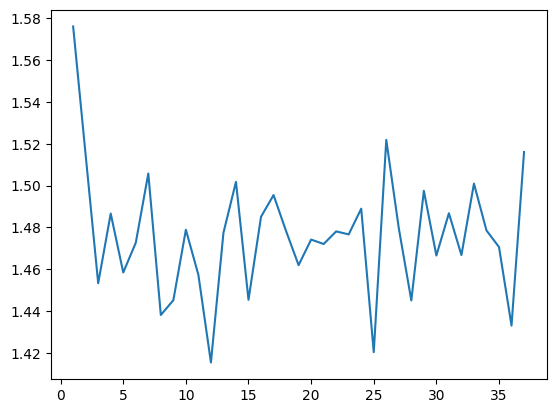

In [11]:
# plot curves_df: curve_number vs angle_diff
plt.plot(curves_df['curve_number'], curves_df['angle_diff'])

In [12]:
# durchschnitt für angle_diff aus curves_df berechnen
angle_diff_avg = curves_df['angle_diff'].mean()
angle_diff_std = curves_df['angle_diff'].std()
angle_diff_min = curves_df['angle_diff'].min()
angle_diff_max = curves_df['angle_diff'].max()
print("angle_diff_avg:", angle_diff_avg)
print("angle_diff_std:", angle_diff_std)
print("angle_diff_min:", angle_diff_min)
print("angle_diff_max:", angle_diff_max)

print((np.pi)/2)

angle_diff_avg: 1.4762302973918293
angle_diff_std: 0.03040045051113528
angle_diff_min: 1.4153606679862278
angle_diff_max: 1.5761133640475302
1.5707963267948966


# Motors_None_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.4967479531240124 \
angle_diff_std: 0.03614608905968683 \
angle_diff_min: 1.3797297454742905 \
angle_diff_max: 1.5812122948826817 

# IMU_Integral_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.528037163012127 \
angle_diff_std: 0.03054410336645176 \
angle_diff_min: 1.46811859290787 \
angle_diff_max: 1.5849497893218487 

# IMU_Madgwick_Square
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.5702883845330975 \
angle_diff_std: 0.017692093995443962 \
angle_diff_min: 1.5461179065283241 \
angle_diff_max: 1.620963152947934

# IMU_Madgwick_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.562401486477613 \
angle_diff_std: 0.028683934108683796 \
angle_diff_min: 1.4774013953564875 \
angle_diff_max: 1.6253780882191933 

# IMU_PID_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.4751237804671418 \
angle_diff_std: 0.030066532091121687 \
angle_diff_min: 1.4153606679862278 \
angle_diff_max: 1.5761133640475302



C:\Users\charl\AppData\Local\Temp\ipykernel_10284\4005541340.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


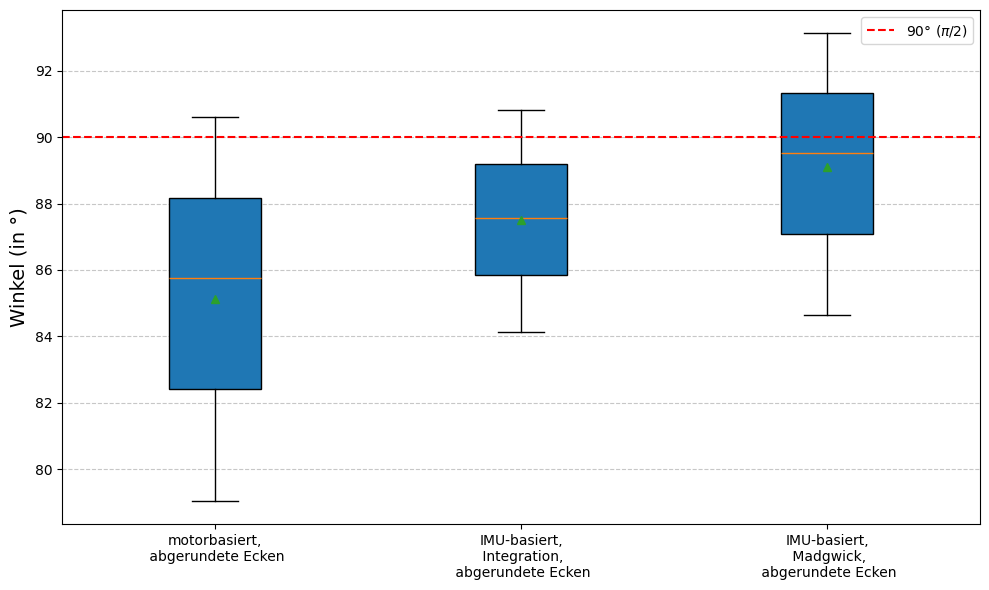

In [14]:
# Daten in Radiant
data = {
    "motorbasiert,\n abgerundete Ecken": [1.4967479531240124, 1.3797297454742905, 1.5812122948826817],
    "IMU-basiert,\n Integration,\n abgerundete Ecken": [1.528037163012127, 1.46811859290787, 1.5849497893218487],
    "IMU-basiert,\n Madgwick,\n abgerundete Ecken": [1.562401486477613, 1.4774013953564875, 1.6253780882191933],
    # "IMU-basiert,\n Madgwick,\n scharfe Ecken": [1.5702883845330975, 1.5461179065283241, 1.620963152947934],
    # "IMU-basiert,\n PID-Regler,\n abgerundete Ecken": [1.4751237804671418, 1.4153606679862278, 1.5761133640475302],
}

# Daten von Radiant in Grad umrechnen
data_deg = {key: [np.degrees(value) for value in values] for key, values in data.items()}

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    data_deg.values(), 
    vert=True, 
    patch_artist=True, 
    labels=data_deg.keys(), 
    showmeans=True
)

# Stil und Beschriftung
# ax.set_title("Boxplot für gefahrene Winkel (in °)", fontsize=16)
ax.set_ylabel("Winkel (in °)", fontsize=14)
ax.axhline(y=np.degrees(1.5707963267948966), color='r', linestyle='--', label=r"90° ($\pi$/2)")
ax.legend()

# Plot anzeigen
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
